In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Model + Data Loading

In [47]:
import pprint

import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from pathlib import Path

from language_structure import *
from train import load, load_dataloader
from model import *
from utils import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vocab_file = './uncased_L-12_H-768_A-12/vocab.txt'
tokenizer = tokenization.FullTokenizer(vocab_file=vocab_file, do_lower_case=True)
pp = pprint.PrettyPrinter(indent=4)
ID = "JUNE25-5K"

# IMDB

Total Time: 87.4088 
Train Time: 18.7685
Max (Validation, Train): (0.45, 0.47)


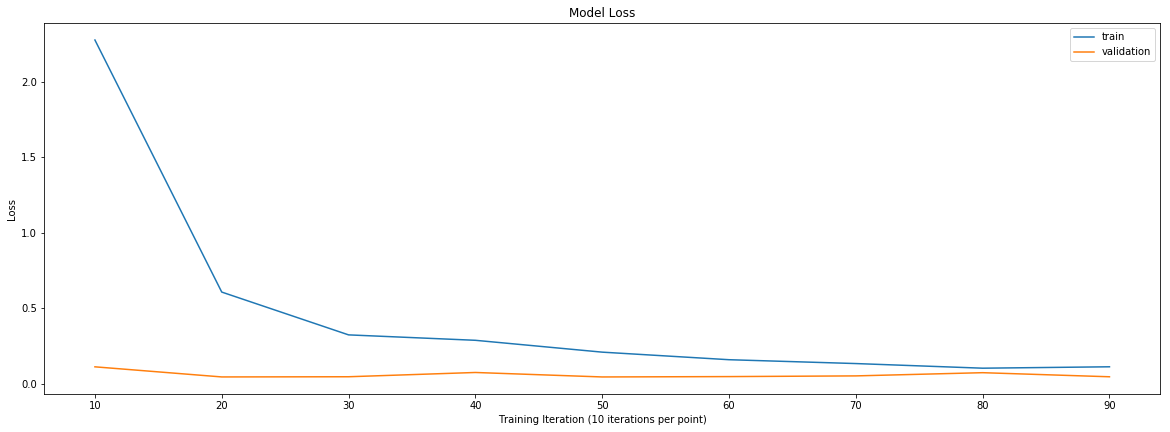

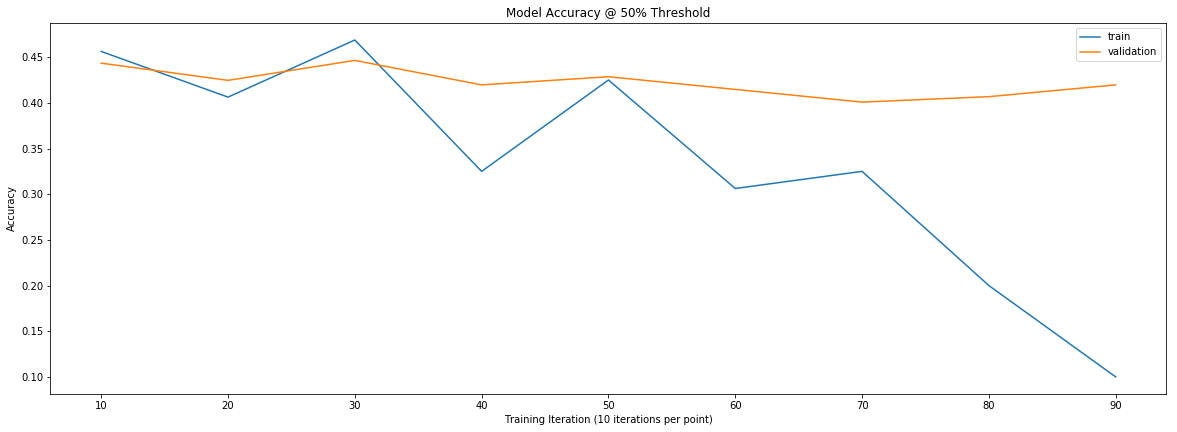

{   '--COLA': False,
    '--IMDB': True,
    '--QNLI': False,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': False,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '1000',
    '--help': False,
    '--hidden-size': '768',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '3',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Vanilla Dropout',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '10'}


In [32]:
model_path = 'complete_IMDB-VD-{}'.format(ID)
model1, _, _, m1 = load(model_path, cpu=True, load_model=False)
m1['args']['--save-to'] = 'Vanilla Dropout'
plot_metrics(m1, first_n=None)
pp.pprint(m1['args'])

Total Time: 104.6454 
Train Time: 22.8513
Max (Validation, Train): (0.45, 0.55)


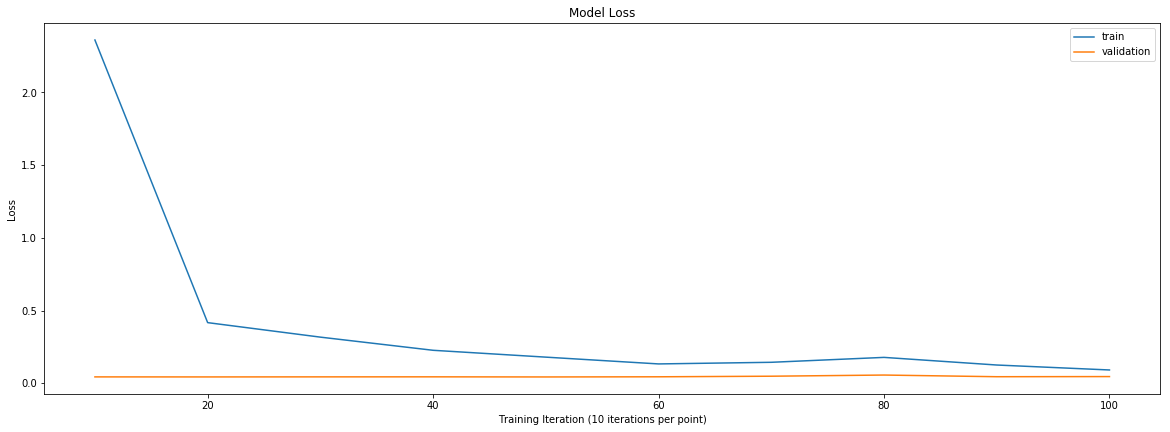

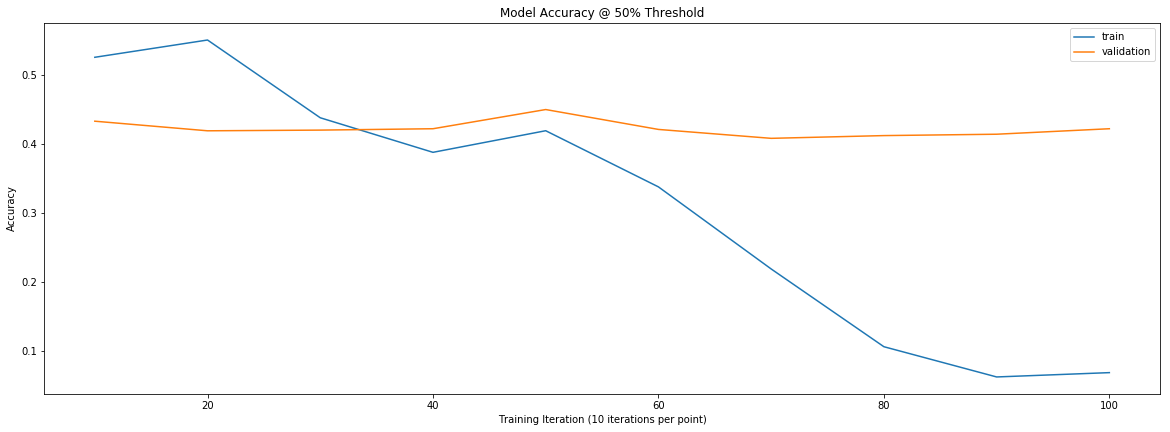

{   '--COLA': False,
    '--IMDB': True,
    '--QNLI': False,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': True,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '1000',
    '--help': False,
    '--hidden-size': '768',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '3',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Attention-Dropout (Ours)',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '10'}


In [33]:
model_path = 'complete_IMDB-AD-{}'.format(ID)
model2, _, _, m2 = load(model_path, cpu=True, load_model=False)
m2['args']['--save-to'] = 'Attention-Dropout (Ours)'
plot_metrics(m2, first_n=None)
pp.pprint(m2['args'])

--------Vanilla Dropout----------
Max (Validation, Train): (0.45, 0.47)
Total Time: 87.4088 
Train Time: 18.7685
--------Attention-Dropout (Ours)----------
Max (Validation, Train): (0.45, 0.55)
Total Time: 104.6454 
Train Time: 22.8513


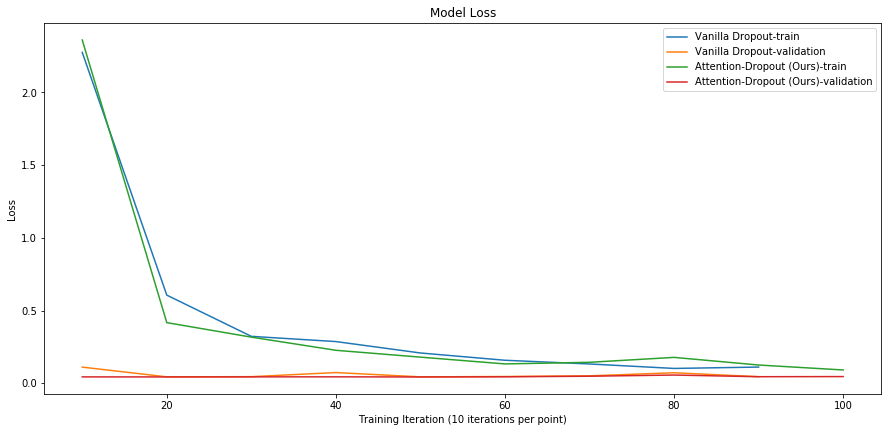

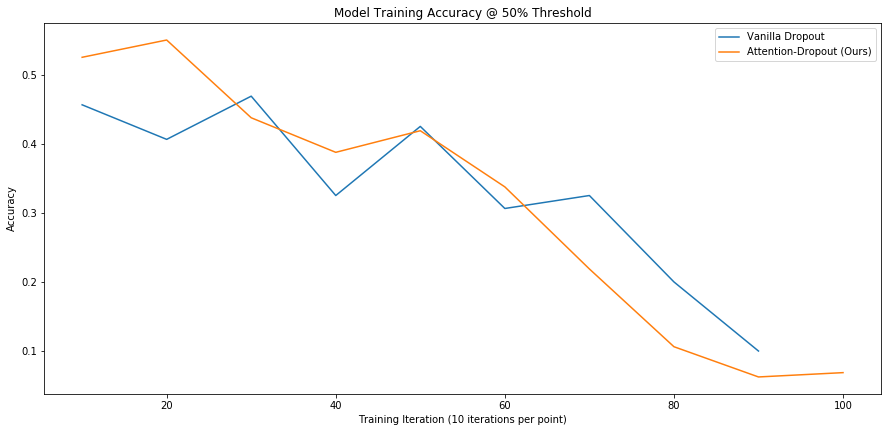

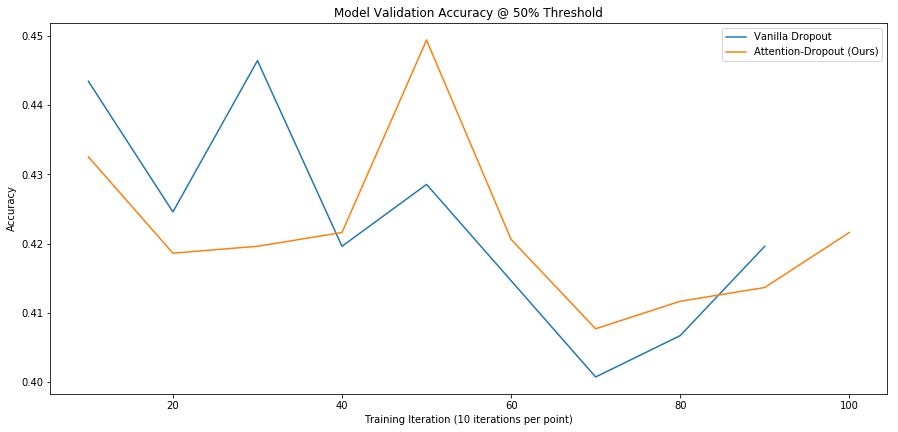

In [34]:
compare_metrics([m1, m2], first_n=None)

# COLA

Total Time: 19.8614 
Train Time: 9.6646
Max (Validation, Train): (0.67, 0.69)


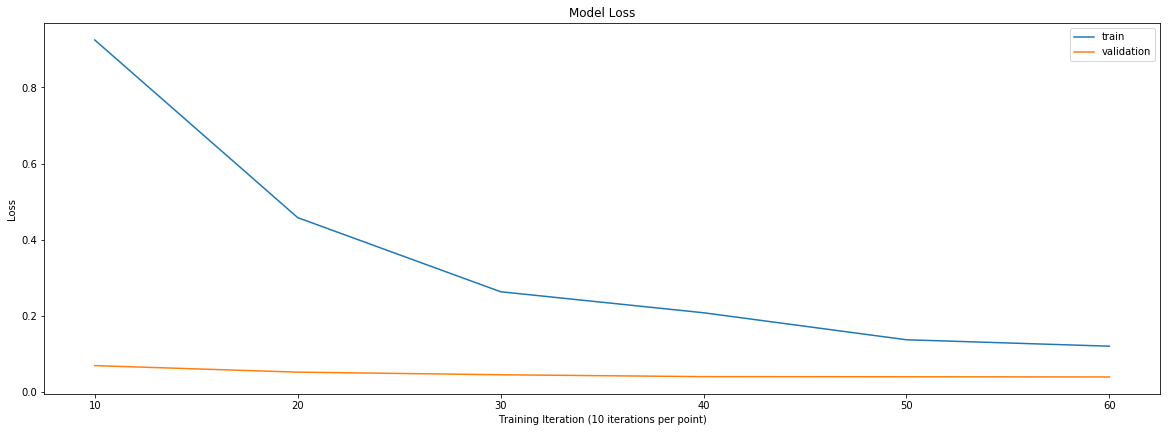

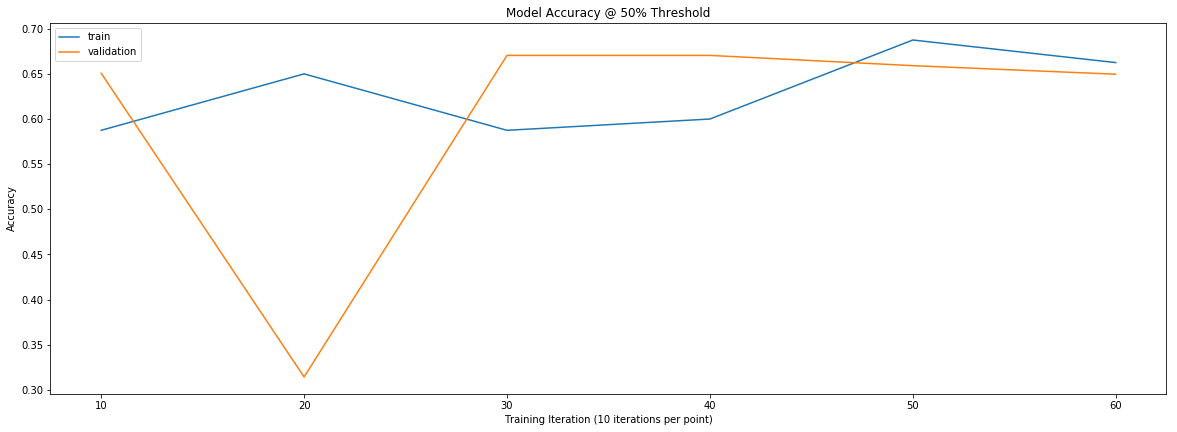

{   '--COLA': True,
    '--IMDB': False,
    '--QNLI': False,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': False,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '1000',
    '--help': False,
    '--hidden-size': '768',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '3',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Vanilla Dropout',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '10'}


In [35]:
model_path = 'complete_COLA-VD-{}'.format(ID)
model1, _, _, m1 = load(model_path, cpu=True, load_model=False)
m1['args']['--save-to'] = 'Vanilla Dropout'
plot_metrics(m1, first_n=None)
pp.pprint(m1['args'])

Total Time: 23.8117 
Train Time: 11.2289
Max (Validation, Train): (0.67, 0.64)


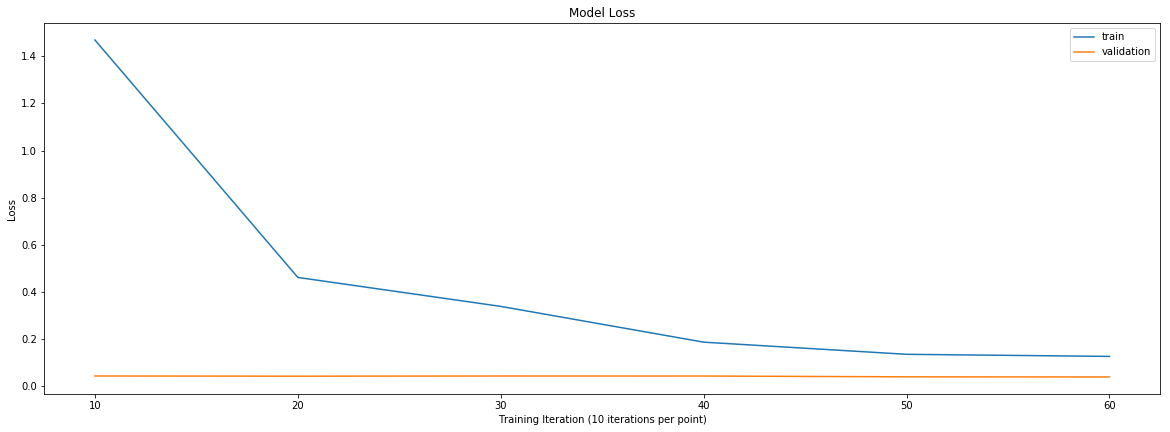

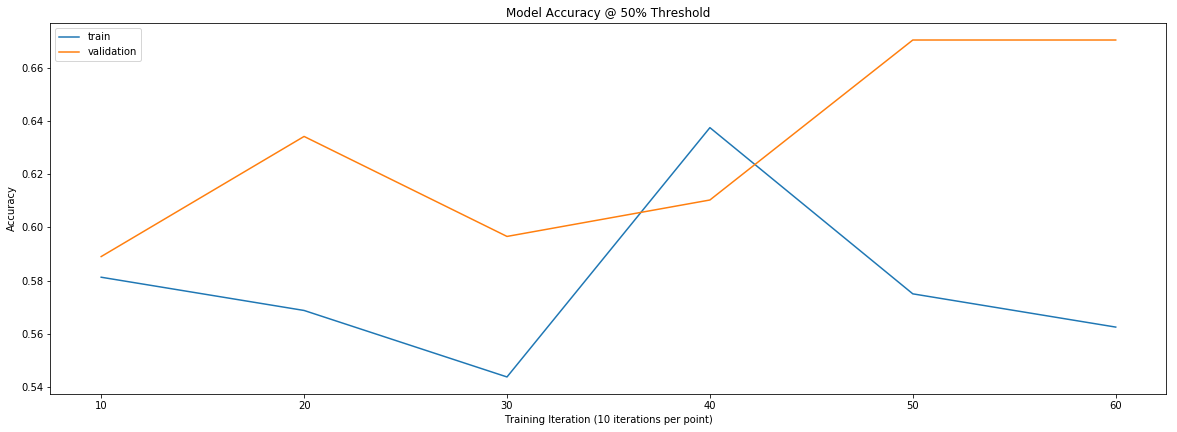

{   '--COLA': True,
    '--IMDB': False,
    '--QNLI': False,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': True,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '1000',
    '--help': False,
    '--hidden-size': '768',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '3',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Attention-Dropout (Ours)',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '10'}


In [36]:
model_path = 'complete_COLA-AD-{}'.format(ID)
model2, _, _, m2 = load(model_path, cpu=True, load_model=False)
m2['args']['--save-to'] = 'Attention-Dropout (Ours)'
plot_metrics(m2, first_n=None)
pp.pprint(m2['args'])

--------Vanilla Dropout----------
Max (Validation, Train): (0.67, 0.69)
Total Time: 19.8614 
Train Time: 9.6646
--------Attention-Dropout (Ours)----------
Max (Validation, Train): (0.67, 0.64)
Total Time: 23.8117 
Train Time: 11.2289


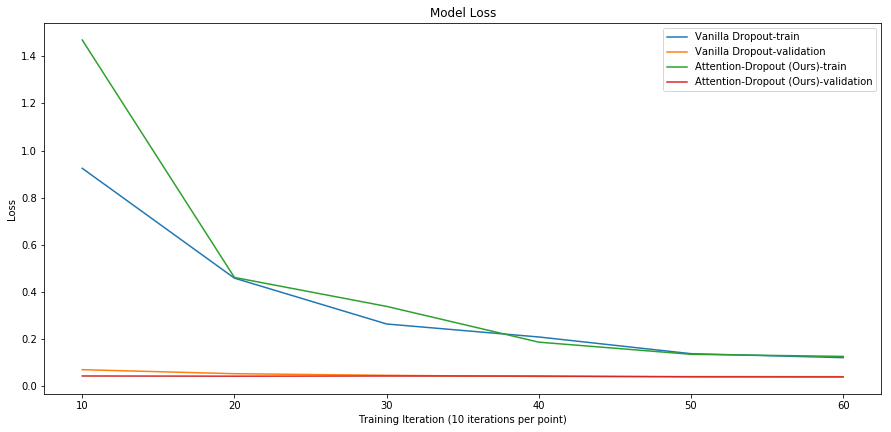

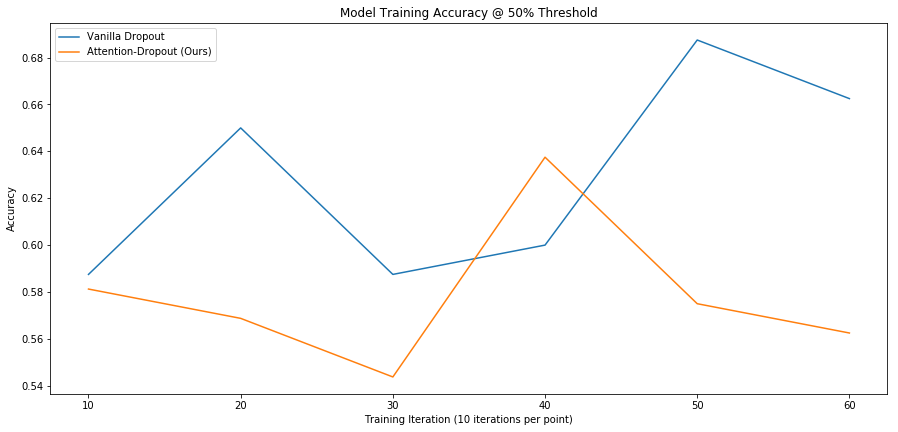

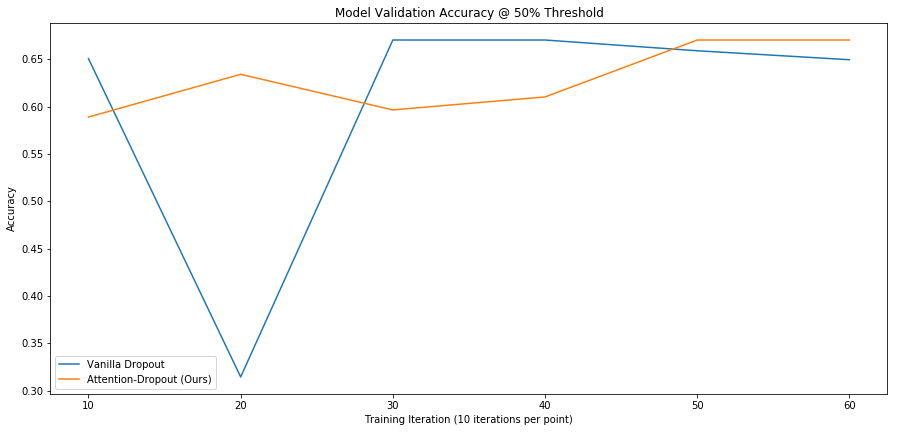

In [37]:
compare_metrics([m1, m2], first_n=None)

# QNLI

Total Time: 44.9576 
Train Time: 12.0444
Max (Validation, Train): (0.51, 0.57)


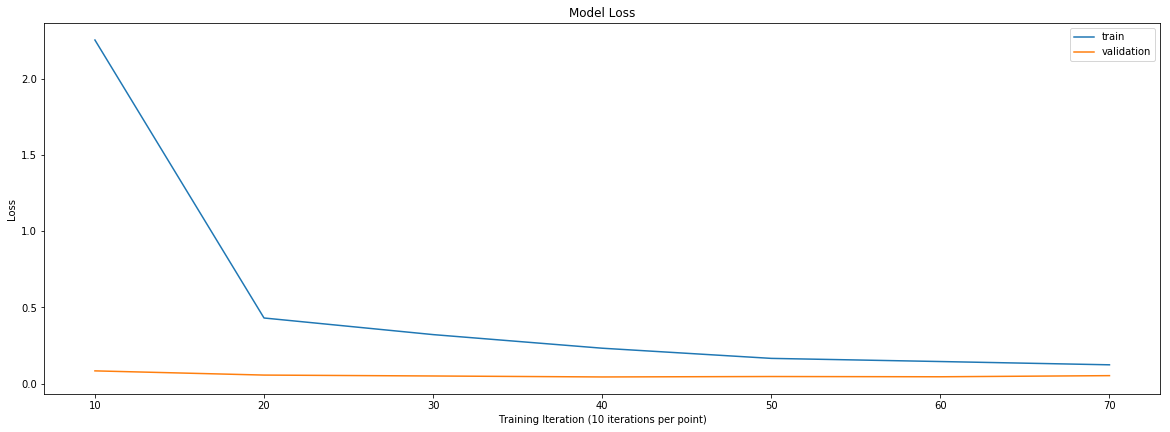

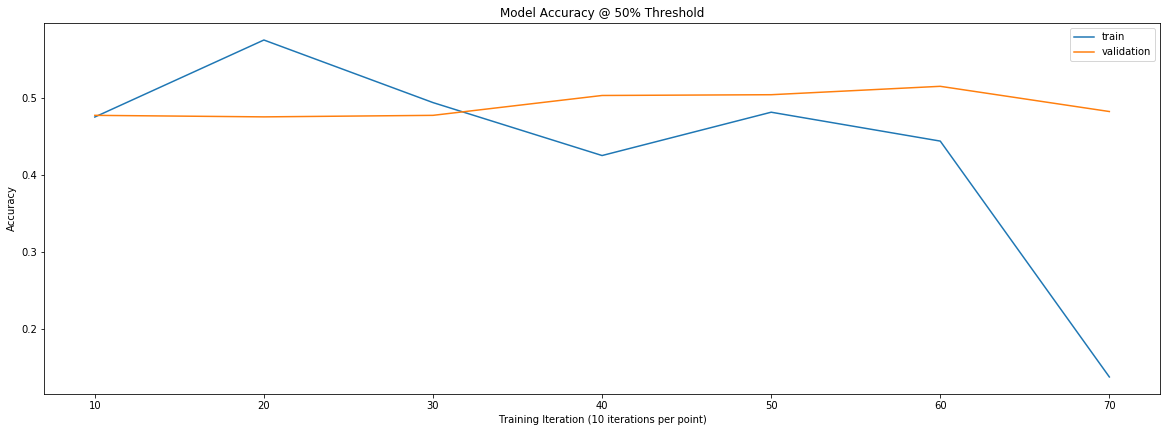

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': True,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': False,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '1000',
    '--help': False,
    '--hidden-size': '768',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '3',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Vanilla Dropout',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '10'}


In [38]:
model_path = 'complete_QNLI-VD-{}'.format(ID)
model1, _, _, m1 = load(model_path, cpu=True, load_model=False)
m1['args']['--save-to'] = 'Vanilla Dropout'
plot_metrics(m1, first_n=None)
pp.pprint(m1['args'])

Total Time: 34.8323 
Train Time: 13.658
Max (Validation, Train): (0.49, 0.54)


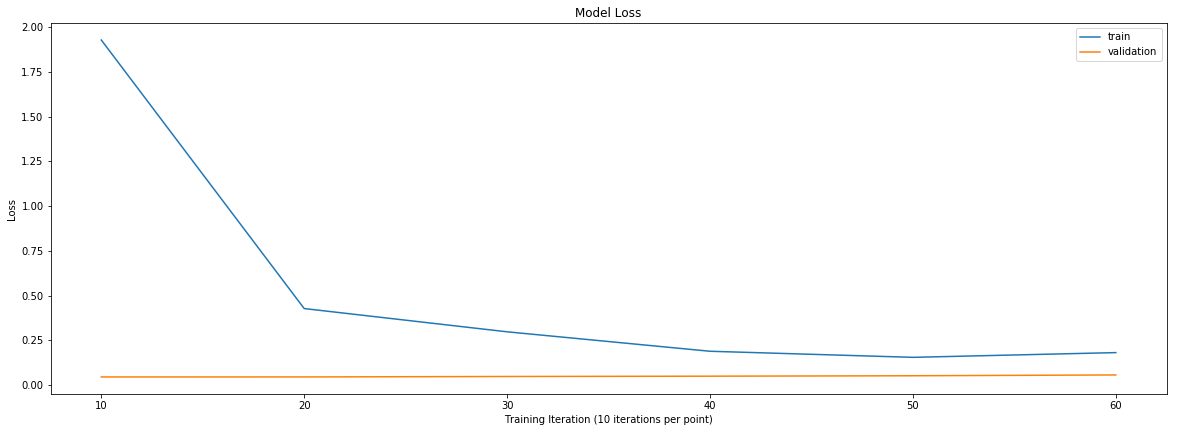

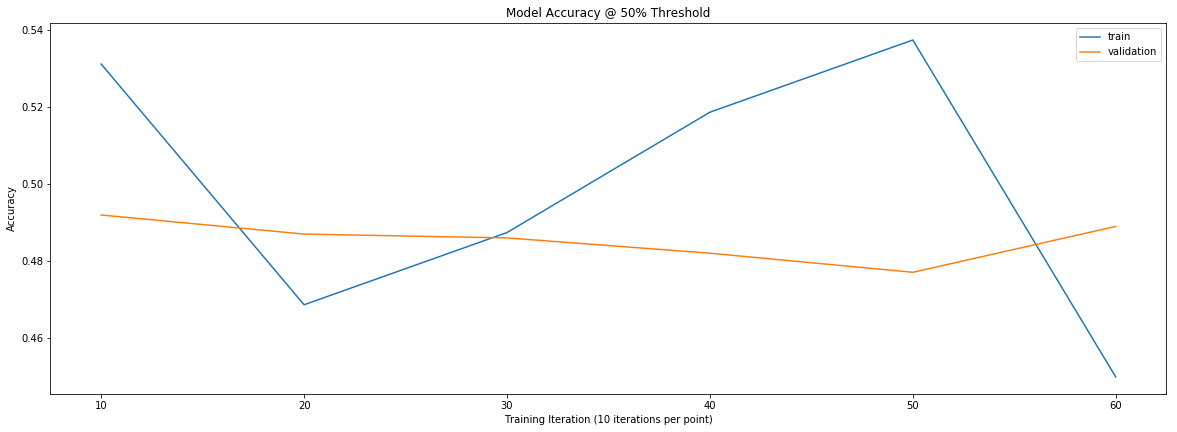

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': True,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': True,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '1000',
    '--help': False,
    '--hidden-size': '768',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '3',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Attention-Dropout (Ours)',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '10'}


In [39]:
model_path = 'complete_QNLI-AD-{}'.format(ID)
model2, _, _, m2 = load(model_path, cpu=True, load_model=False)
m2['args']['--save-to'] = 'Attention-Dropout (Ours)'
plot_metrics(m2, first_n=None)
pp.pprint(m2['args'])

--------Vanilla Dropout----------
Max (Validation, Train): (0.51, 0.57)
Total Time: 44.9576 
Train Time: 12.0444
--------Attention-Dropout (Ours)----------
Max (Validation, Train): (0.49, 0.54)
Total Time: 34.8323 
Train Time: 13.658


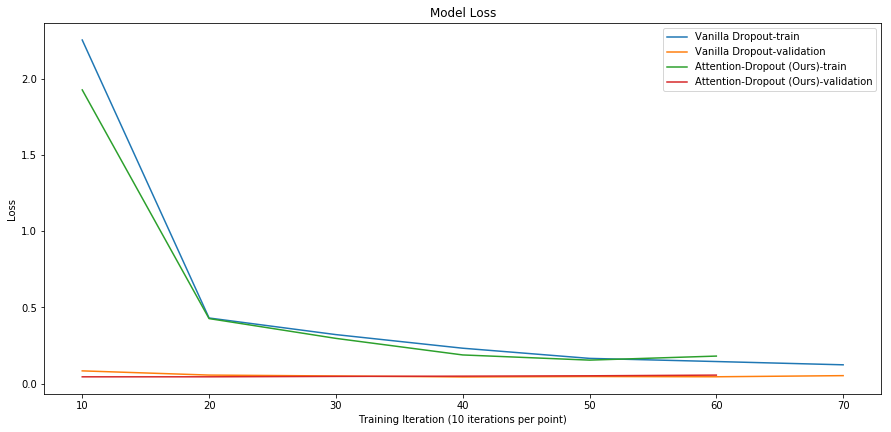

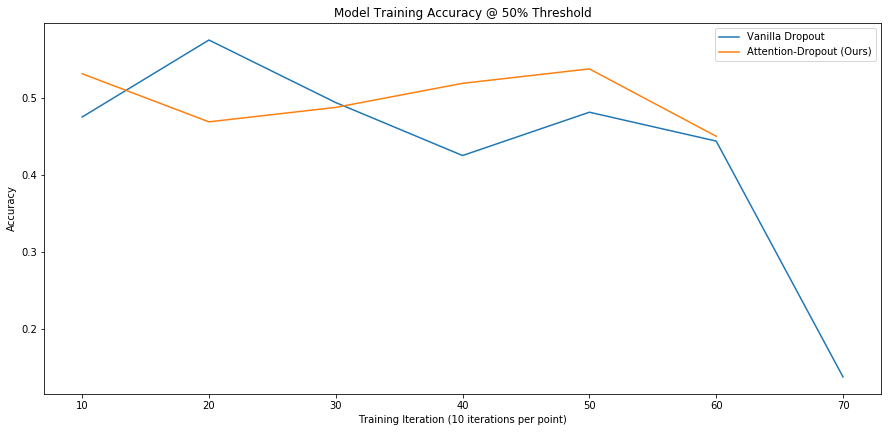

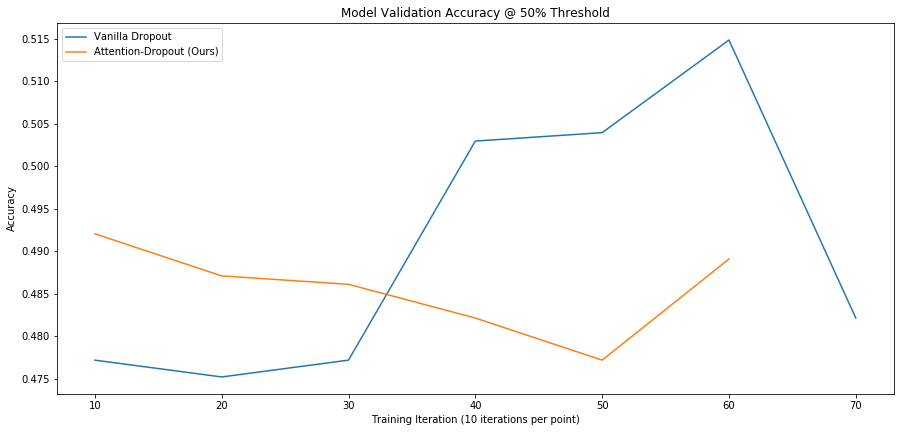

In [40]:
compare_metrics([m1, m2], first_n=None)

# QQP

Total Time: 28.7617 
Train Time: 10.8883
Max (Validation, Train): (0.61, 0.60)


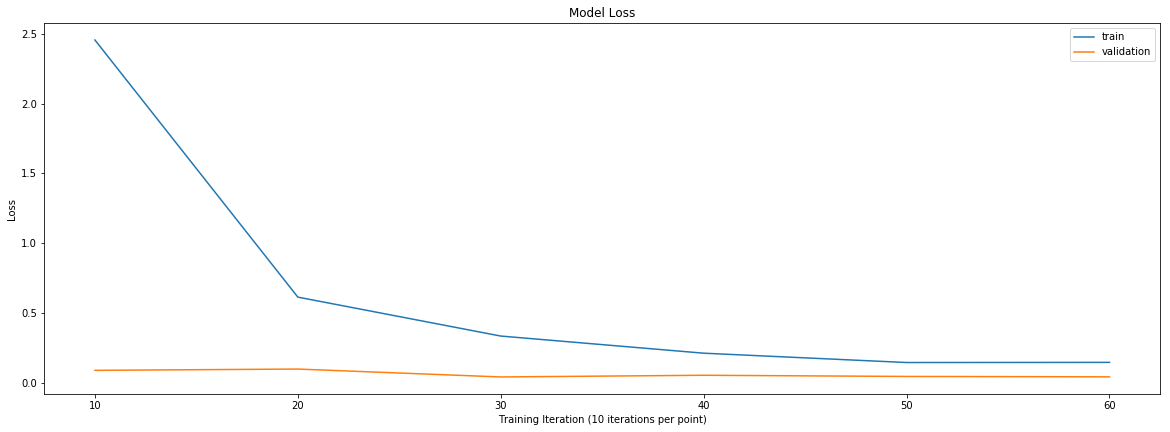

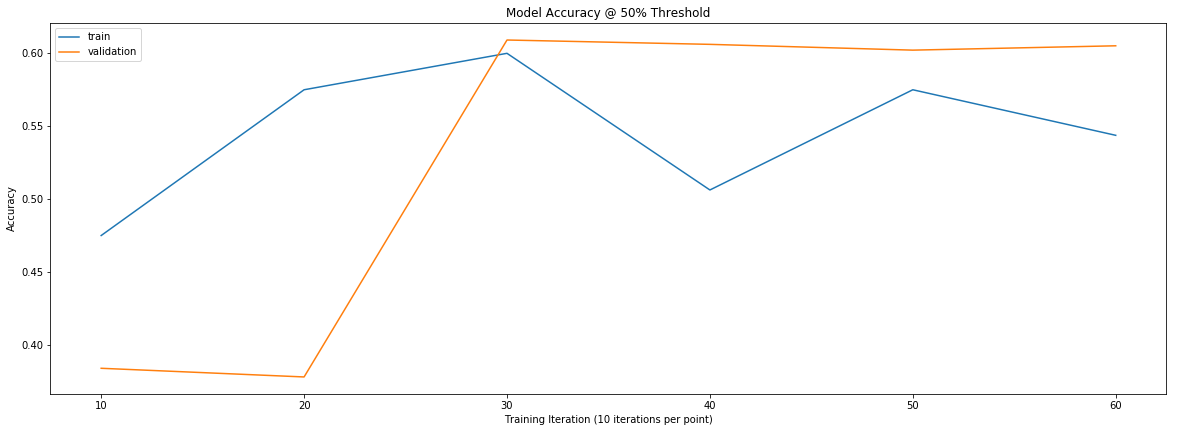

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': False,
    '--QQP': True,
    '--RTE': False,
    '--attention-dropout': False,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '1000',
    '--help': False,
    '--hidden-size': '768',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '3',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Vanilla Dropout',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '10'}


In [41]:
model_path = 'complete_QQP-VD-{}'.format(ID)
model1, _, _, m1 = load(model_path, cpu=True, load_model=False)
m1['args']['--save-to'] = 'Vanilla Dropout'
plot_metrics(m1, first_n=None)
pp.pprint(m1['args'])

Total Time: 30.3295 
Train Time: 12.688
Max (Validation, Train): (0.64, 0.63)


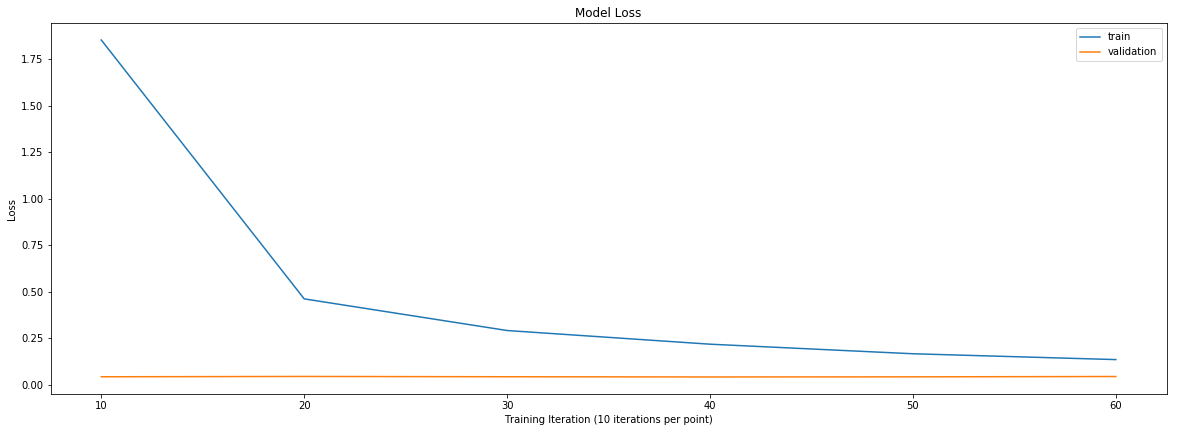

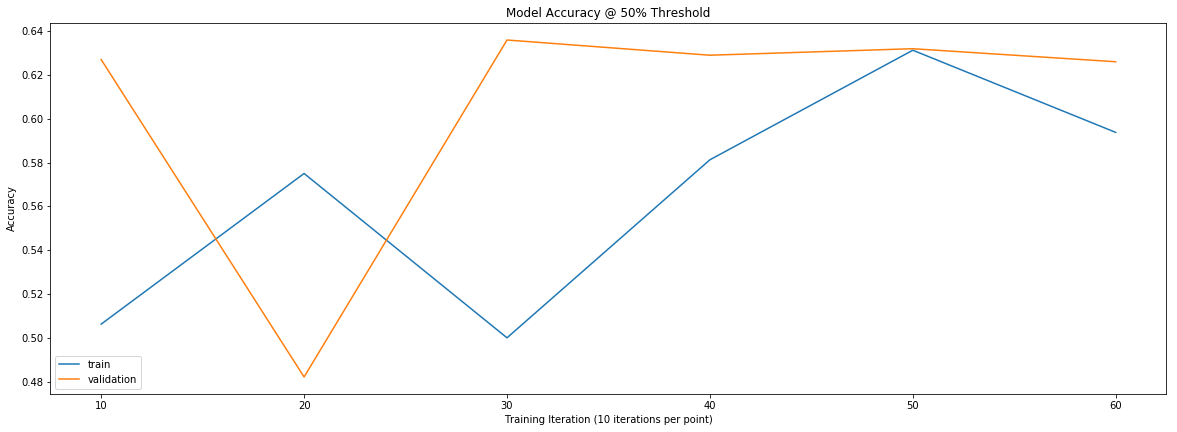

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': False,
    '--QQP': True,
    '--RTE': False,
    '--attention-dropout': True,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '1000',
    '--help': False,
    '--hidden-size': '768',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '3',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Attention-Dropout (Ours)',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '10'}


In [42]:
model_path = 'complete_QQP-AD-{}'.format(ID)
model2, _, _, m2 = load(model_path, cpu=True, load_model=False)
m2['args']['--save-to'] = 'Attention-Dropout (Ours)'
plot_metrics(m2, first_n=None)
pp.pprint(m2['args'])

--------Vanilla Dropout----------
Max (Validation, Train): (0.61, 0.60)
Total Time: 28.7617 
Train Time: 10.8883
--------Attention-Dropout (Ours)----------
Max (Validation, Train): (0.64, 0.63)
Total Time: 30.3295 
Train Time: 12.688


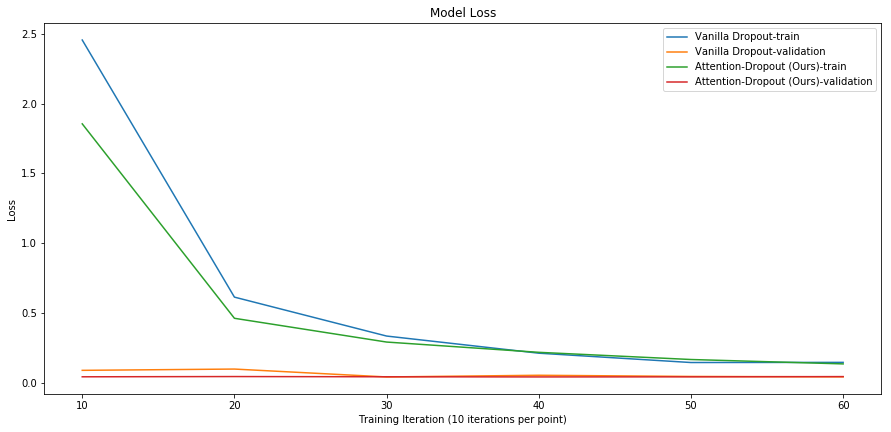

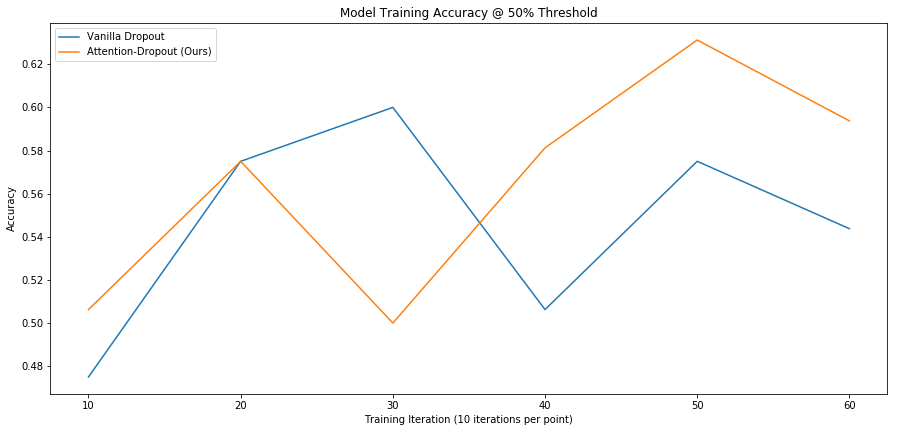

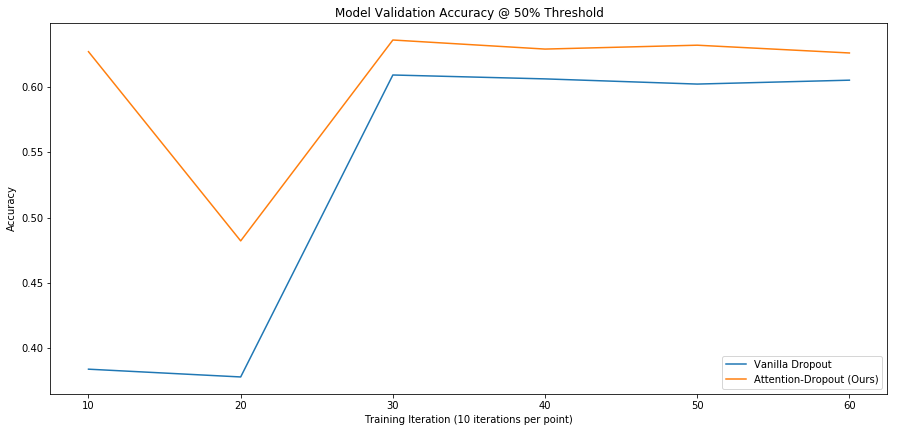

In [43]:
compare_metrics([m1, m2], first_n=None)

# RTE

Total Time: 56.9173 
Train Time: 30.0806
Max (Validation, Train): (0.34, 0.56)


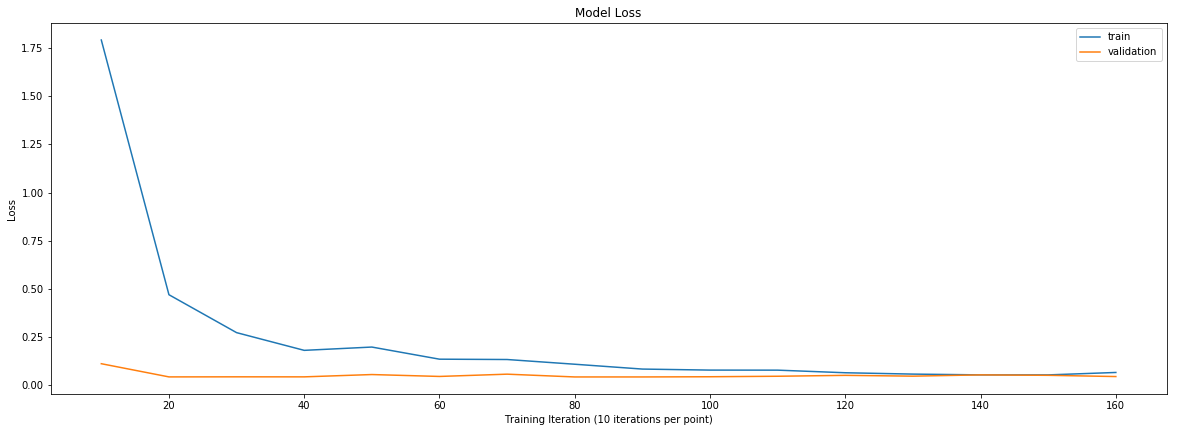

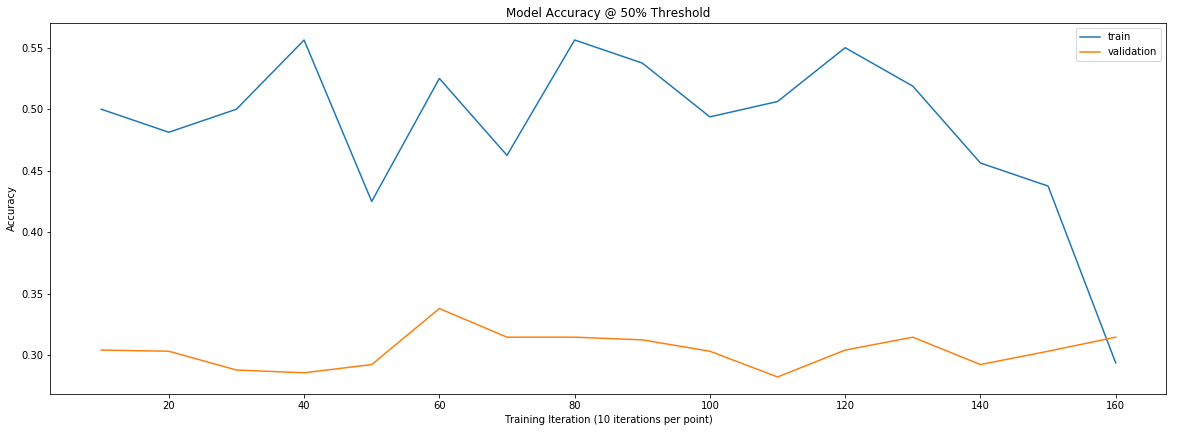

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': False,
    '--QQP': False,
    '--RTE': True,
    '--attention-dropout': False,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '0',
    '--help': False,
    '--hidden-size': '768',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '3',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Vanilla Dropout',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '10'}


In [44]:
model_path = 'complete_RTE-VD-{}'.format(ID)
model1, _, _, m1 = load(model_path, cpu=True, load_model=False)
m1['args']['--save-to'] = 'Vanilla Dropout'
plot_metrics(m1, first_n=None)
pp.pprint(m1['args'])

Total Time: 72.3167 
Train Time: 37.5942
Max (Validation, Train): (0.34, 0.60)


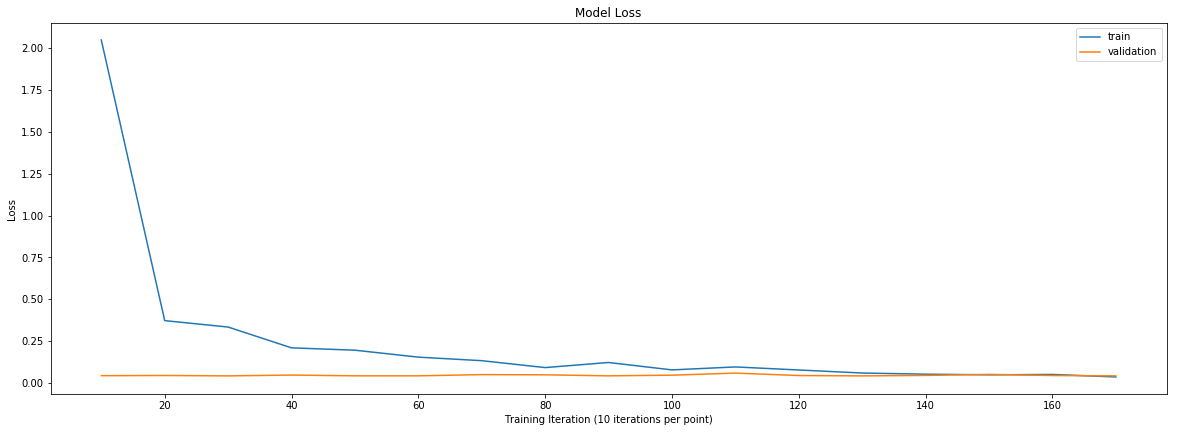

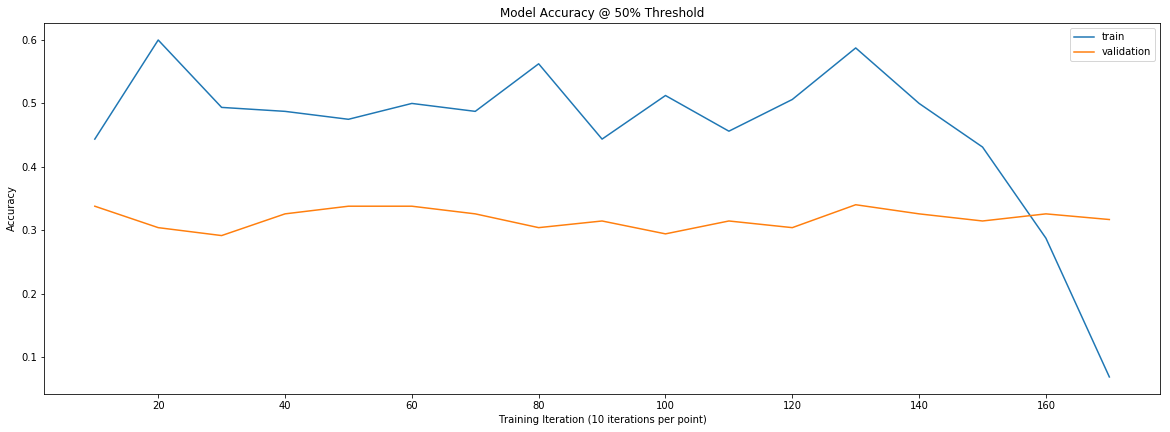

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': False,
    '--QQP': False,
    '--RTE': True,
    '--attention-dropout': True,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '0',
    '--help': False,
    '--hidden-size': '768',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '3',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Attention-Dropout (Ours)',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '10'}


In [45]:
model_path = 'complete_RTE-AD-{}'.format(ID)
model2, _, _, m2 = load(model_path, cpu=True, load_model=False)
m2['args']['--save-to'] = 'Attention-Dropout (Ours)'
plot_metrics(m2, first_n=None)
pp.pprint(m2['args'])

--------Vanilla Dropout----------
Max (Validation, Train): (0.34, 0.56)
Total Time: 56.9173 
Train Time: 30.0806
--------Attention-Dropout (Ours)----------
Max (Validation, Train): (0.34, 0.60)
Total Time: 72.3167 
Train Time: 37.5942


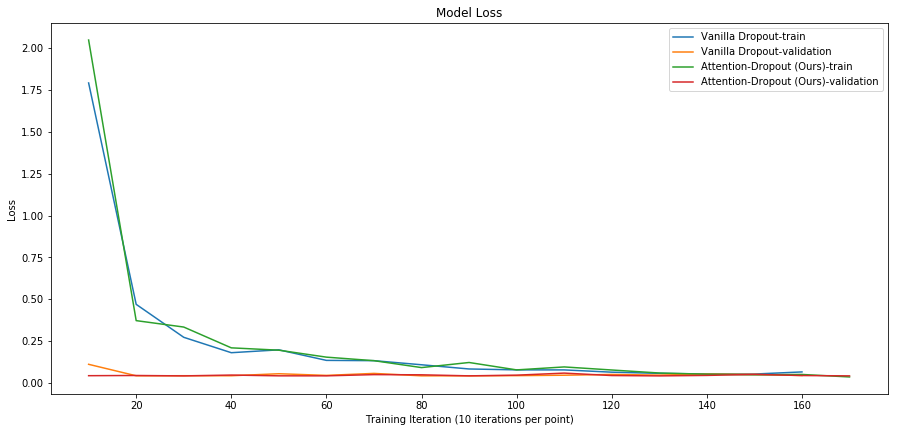

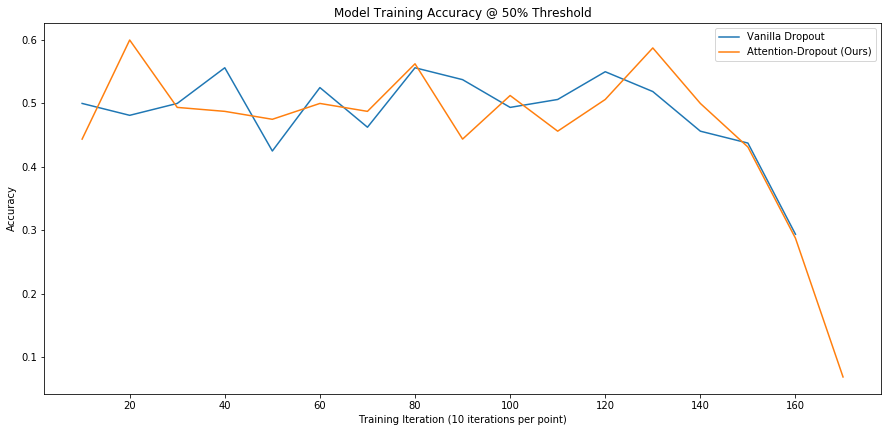

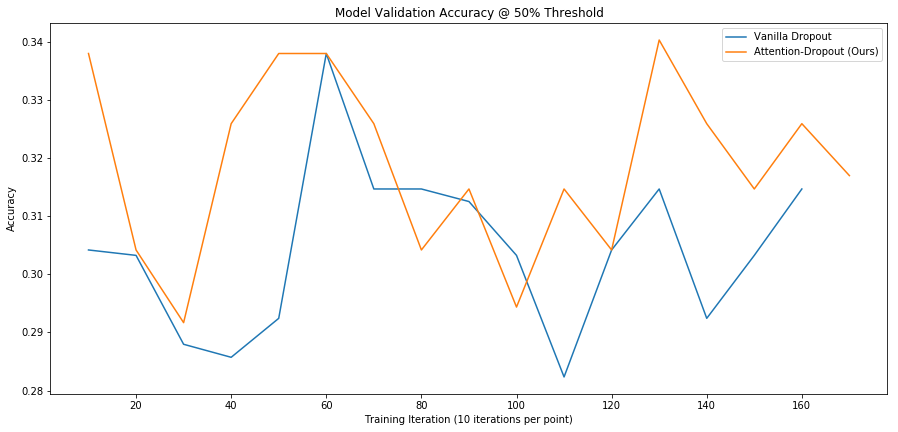

In [46]:
compare_metrics([m1, m2], first_n=None)